# Imports

In [1]:
import pandas as pd
import numpy as np
import sforecast as sf

import matplotlib.pyplot as plt
import seaborn as sns
import beautifulplots as bp
from datetime import datetime as dt
from dateutil.relativedelta import relativedelta

pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows',20)
pd.set_option('display.max_columns', None)

# Load M5 Data

* Data for 20 items, 
* The items exhibit strong positive, negative and some with low correlation to each other

In [2]:

# sales_day dataframe

data_path = "../data"

# calendar events
print("\ncal")
cal = pd.read_csv(f'{data_path}/calendar.csv', parse_dates = ["date"])
display(cal.head())


# prices
print("\nprices")
prices = pd.read_csv(f'{data_path}/sell_prices.csv')
display(prices.head())
  
print("\nsales_day")
sales = pd.read_csv(f'{data_path}/sales_train_evaluation.csv') 

# melt to one row per transaction

print("\n  melt sales -> sales_day ...")
sales_day = pd.melt(sales, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name='d', value_name='unit_sales')


# dates ... merge with cal dates ( not events)
print("\n  merge cal dates ...")
sales_day = sales_day.merge(cal[["d" ,"date", "year"  , "month" ,"weekday" , "wm_yr_wk"]], on="d", how="left")
sales_day['date']=pd.to_datetime(sales_day['date']).dt.normalize()
sales_day['year']=sales_day['date'].dt.isocalendar().year # gets the correct year corresponding to ISO week
sales_day['week']=sales_day['date'].dt.isocalendar().week # potentially 53 weeks in ISO year
sales_day['month']=sales_day['date'].dt.month #
sales_day['yearweek']= sales_day['year']*100+sales_day['week']  #.astype('int64')
sales_day['yearmonth']= sales_day['year']*100+sales_day['month']  #.astype('int64')
display(sales_day.tail())


# merge with price
print("\n  merge w price ...")
sales_day = sales_day.merge(prices, on=['store_id','item_id','wm_yr_wk'], how='left')
sales_day = sales_day[sales_day["sell_price"].notnull()]


print(f'sales_day.shape = {sales_day.shape}')
display(sales_day.head())
    



cal


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1



prices


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26



sales_day

  melt sales -> sales_day ...

  merge cal dates ...


,id,item_id,dept_id,cat_id,store_id,state_id,d,unit_sales,date,year,month,weekday,wm_yr_wk,week,yearweek,yearmonth
59181085,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1941,1,2016-05-22,2016,5,Sunday,11617,20,201620,201605
59181086,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1941,0,2016-05-22,2016,5,Sunday,11617,20,201620,201605
59181087,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1941,2,2016-05-22,2016,5,Sunday,11617,20,201620,201605
59181088,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1941,0,2016-05-22,2016,5,Sunday,11617,20,201620,201605
59181089,FOODS_3_827_WI_3_evaluation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,d_1941,1,2016-05-22,2016,5,Sunday,11617,20,201620,201605



  merge w price ...
sales_day.shape = (46881677, 17)


,id,item_id,dept_id,cat_id,store_id,state_id,d,unit_sales,date,year,month,weekday,wm_yr_wk,week,yearweek,yearmonth,sell_price
7,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12,2011-01-29,2011,1,Saturday,11101,4,201104,201101,0.46
8,HOBBIES_1_009_CA_1_evaluation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1,2,2011-01-29,2011,1,Saturday,11101,4,201104,201101,1.56
9,HOBBIES_1_010_CA_1_evaluation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,2011,1,Saturday,11101,4,201104,201101,3.17
11,HOBBIES_1_012_CA_1_evaluation,HOBBIES_1_012,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,2011,1,Saturday,11101,4,201104,201101,5.98
14,HOBBIES_1_015_CA_1_evaluation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,d_1,4,2011-01-29,2011,1,Saturday,11101,4,201104,201101,0.70


 # Sales N Items

In [5]:
item_list20 = ['FOODS_1_084','FOODS_2_254', 'FOODS_2_300', 'FOODS_3_030', 'FOODS_3_034','FOODS_3_185', 
             'FOODS_3_297', 'FOODS_3_393', 'HOBBIES_1_018','HOBBIES_1_418','HOBBIES_2_012', 'HOBBIES_2_029',
             'HOBBIES_2_127','HOUSEHOLD_1_091', 'HOUSEHOLD_1_219', 'HOUSEHOLD_1_287','HOUSEHOLD_1_416',
             'HOUSEHOLD_2_332','HOUSEHOLD_2_457','HOUSEHOLD_2_462']

item_list7=['HOUSEHOLD_1_416','FOODS_2_044', 'FOODS_3_030','HOBBIES_1_418','CA_1_FOODS_3_FOODS_3_185',
       'HOUSEHOLD_1_HOUSEHOLD_1_219','FOODS_3_393']

item_list = item_list7
store_id = "CA_1"
Nitems = len(item_list)
print(f'Nitems = {Nitems}')

sales_N_items = sales_day[sales_day["store_id"]==store_id]
sales_N_items = sales_N_items[sales_N_items["item_id"].isin(item_list)]

print("sales_N_items")
print(sales_N_items.shape)
sales_N_items.head()


Nitems = 7
sales_N_items
(8753, 17)


,id,item_id,dept_id,cat_id,store_id,state_id,d,unit_sales,date,year,month,weekday,wm_yr_wk,week,yearweek,yearmonth,sell_price
971,HOUSEHOLD_1_416_CA_1_evaluation,HOUSEHOLD_1_416,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,d_1,1,2011-01-29,2011,1,Saturday,11101,4,201104,201101,3.32
1871,FOODS_2_044_CA_1_evaluation,FOODS_2_044,FOODS_2,FOODS,CA_1,CA,d_1,0,2011-01-29,2011,1,Saturday,11101,4,201104,201101,2.98
2255,FOODS_3_030_CA_1_evaluation,FOODS_3_030,FOODS_3,FOODS,CA_1,CA,d_1,45,2011-01-29,2011,1,Saturday,11101,4,201104,201101,1.00
31461,HOUSEHOLD_1_416_CA_1_evaluation,HOUSEHOLD_1_416,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,d_2,1,2011-01-30,2011,1,Sunday,11101,4,201104,201101,3.32
32361,FOODS_2_044_CA_1_evaluation,FOODS_2_044,FOODS_2,FOODS,CA_1,CA,d_2,0,2011-01-30,2011,1,Sunday,11101,4,201104,201101,2.98


# Wide Covariate DataFrame

In [7]:
def to_flat_columns(hier_cols):
    flat_cols=[]
    for clist in hier_cols:
        for n,ci in enumerate(clist):
            c = ci if n == 0 else c+"_"+ci 
        flat_cols.append(c)
    return flat_cols

In [8]:
# https://towardsdatascience.com/reshaping-a-pandas-dataframe-long-to-wide-and-vice-versa-517c7f0995ad
# https://www.digitalocean.com/community/tutorials/pandas-melt-unmelt-pivot-function


# Pivot/unmelt long to wide
sales_dimensions = ["store_id", "dept_id" , "item_id"]
sales_N_items_w = sales_N_items.copy()
sales_N_items_w = sales_N_items_w.pivot(index = "date", columns = sales_dimensions, values=["unit_sales" , "sell_price"])
print("sales_N_items_w .... wide dataframe ... hierarchical columns")
display(sales_N_items_w.head())


# pandas multi_cols or flat_cols
multi_cols= sales_N_items_w.columns
flat_cols = to_flat_columns(sales_N_items_w.columns)
sales_N_items_w.columns = flat_cols 
#sales_corritems_w.columns = sales_corritems_w.columns.to_flat_index()

print("sales_N_items_w .... wide dataframe ... flat columns")
print(sales_N_items_w.shape)
display(sales_N_items_w.head())

# sell_price and units

# join common variables ... groupby(groupdimensions) ... last() = year, month, week ... reset_index ... item_id, store_id
aggs = {
    "year":"last",
    "month":"last",
    "week":"last",
    "weekday":"last"
    
}
common_variables_df = sales_N_items.groupby( "date" ).agg(aggs)
print("common_variables_df")
print(common_variables_df.shape)
display(common_variables_df)

# join common variables - year, month, week
sales_N_items_w = sales_N_items_w.join(common_variables_df)
print("sales_N_items_w ... join common variables")
print(sales_N_items_w.shape)
display(sales_N_items_w)

# show columns with NA
print("\nrows w NA")
sales_N_items_w_na = sales_N_items_w[sales_N_items_w.isna().any(axis=1)]
idx_last_na = sales_N_items_w_na.tail(1).index[0]
print(f'index of last na = {idx_last_na}')
display(sales_N_items_w_na)

### delete NAs ... delete rows before the last NA ... this ensure contiguous dates after the last na
sales_N_items_w = sales_N_items_w[sales_N_items_w.index > idx_last_na ]

### reset index, so date is a column. Useful for the merge below
sales_N_items_w = sales_N_items_w.reset_index()

### yearmonth for joining CCI 
sales_N_items_w["yearmonth"] = 100*sales_N_items_w["year"] + sales_N_items_w["month"]

print("\nsales_N_items_w ... delete na")
print(sales_N_items_w.shape)
display(sales_N_items_w) 



sales_N_items_w .... wide dataframe ... hierarchical columns


unit_sales                                                    \
store_id              CA_1                                                     
dept_id        HOUSEHOLD_1     FOODS_2     FOODS_3     HOBBIES_1     FOODS_3   
item_id    HOUSEHOLD_1_416 FOODS_2_044 FOODS_3_030 HOBBIES_1_418 FOODS_3_393   
date                                                                           
2011-01-29             1.0         0.0        45.0           NaN         NaN   
2011-01-30             1.0         0.0        37.0           NaN         NaN   
2011-01-31             0.0         0.0        27.0           NaN         NaN   
2011-02-01             2.0         0.0        99.0           NaN         NaN   
2011-02-02             0.0         0.0        71.0           NaN         NaN   

                sell_price                                                    
store_id              CA_1                                                    
dept_id        HOUSEHOLD_1     FOODS_2     FOODS_3     HOBBIES_1     FOODS_3  
item_id    HOUSEHOLD_1_416 FOODS_2_044 FOODS_3_030 HOBBIES_1_418 FOODS_3_393  
date                                                                          
2011-01-29            3.32        2.98         1.0           NaN         NaN  
2011-01-30            3.32        2.98         1.0           NaN         NaN  
2011-01-31            3.32        2.98         1.0           NaN         NaN  
2011-02-01            3.32        2.98         1.0           NaN         NaN  
2011-02-02            3.32        2.98         1.0           NaN         NaN

sales_N_items_w .... wide dataframe ... flat columns
(1941, 10)


,unit_sales_CA_1_HOUSEHOLD_1_HOUSEHOLD_1_416,unit_sales_CA_1_FOODS_2_FOODS_2_044,unit_sales_CA_1_FOODS_3_FOODS_3_030,unit_sales_CA_1_HOBBIES_1_HOBBIES_1_418,unit_sales_CA_1_FOODS_3_FOODS_3_393,sell_price_CA_1_HOUSEHOLD_1_HOUSEHOLD_1_416,sell_price_CA_1_FOODS_2_FOODS_2_044,sell_price_CA_1_FOODS_3_FOODS_3_030,sell_price_CA_1_HOBBIES_1_HOBBIES_1_418,sell_price_CA_1_FOODS_3_FOODS_3_393
date,,,,,,,,,,
2011-01-29,1.0,0.0,45.0,NaN,NaN,3.32,2.98,1.0,NaN,NaN
2011-01-30,1.0,0.0,37.0,NaN,NaN,3.32,2.98,1.0,NaN,NaN
2011-01-31,0.0,0.0,27.0,NaN,NaN,3.32,2.98,1.0,NaN,NaN
2011-02-01,2.0,0.0,99.0,NaN,NaN,3.32,2.98,1.0,NaN,NaN
2011-02-02,0.0,0.0,71.0,NaN,NaN,3.32,2.98,1.0,NaN,NaN


common_variables_df
(1941, 4)


,year,month,week,weekday
date,,,,
2011-01-29,2011,1,4,Saturday
2011-01-30,2011,1,4,Sunday
2011-01-31,2011,1,5,Monday
2011-02-01,2011,2,5,Tuesday
2011-02-02,2011,2,5,Wednesday
...,...,...,...,...
2016-05-18,2016,5,20,Wednesday
2016-05-19,2016,5,20,Thursday
2016-05-20,2016,5,20,Friday


sales_N_items_w ... join common variables
(1941, 14)


,unit_sales_CA_1_HOUSEHOLD_1_HOUSEHOLD_1_416,unit_sales_CA_1_FOODS_2_FOODS_2_044,unit_sales_CA_1_FOODS_3_FOODS_3_030,unit_sales_CA_1_HOBBIES_1_HOBBIES_1_418,unit_sales_CA_1_FOODS_3_FOODS_3_393,sell_price_CA_1_HOUSEHOLD_1_HOUSEHOLD_1_416,sell_price_CA_1_FOODS_2_FOODS_2_044,sell_price_CA_1_FOODS_3_FOODS_3_030,sell_price_CA_1_HOBBIES_1_HOBBIES_1_418,sell_price_CA_1_FOODS_3_FOODS_3_393,year,month,week,weekday
date,,,,,,,,,,,,,,
2011-01-29,1.0,0.0,45.0,NaN,NaN,3.32,2.98,1.00,NaN,NaN,2011,1,4,Saturday
2011-01-30,1.0,0.0,37.0,NaN,NaN,3.32,2.98,1.00,NaN,NaN,2011,1,4,Sunday
2011-01-31,0.0,0.0,27.0,NaN,NaN,3.32,2.98,1.00,NaN,NaN,2011,1,5,Monday
2011-02-01,2.0,0.0,99.0,NaN,NaN,3.32,2.98,1.00,NaN,NaN,2011,2,5,Tuesday
2011-02-02,0.0,0.0,71.0,NaN,NaN,3.32,2.98,1.00,NaN,NaN,2011,2,5,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-18,2.0,0.0,7.0,1.0,5.0,3.88,2.50,1.48,3.98,3.56,2016,5,20,Wednesday
2016-05-19,2.0,0.0,11.0,1.0,8.0,3.88,2.50,1.48,3.98,3.56,2016,5,20,Thursday
2016-05-20,1.0,0.0,9.0,4.0,5.0,3.88,2.50,1.48,3.98,3.56,2016,5,20,Friday



rows w NA
index of last na = 2013-02-01 00:00:00


,unit_sales_CA_1_HOUSEHOLD_1_HOUSEHOLD_1_416,unit_sales_CA_1_FOODS_2_FOODS_2_044,unit_sales_CA_1_FOODS_3_FOODS_3_030,unit_sales_CA_1_HOBBIES_1_HOBBIES_1_418,unit_sales_CA_1_FOODS_3_FOODS_3_393,sell_price_CA_1_HOUSEHOLD_1_HOUSEHOLD_1_416,sell_price_CA_1_FOODS_2_FOODS_2_044,sell_price_CA_1_FOODS_3_FOODS_3_030,sell_price_CA_1_HOBBIES_1_HOBBIES_1_418,sell_price_CA_1_FOODS_3_FOODS_3_393,year,month,week,weekday
date,,,,,,,,,,,,,,
2011-01-29,1.0,0.0,45.0,NaN,NaN,3.32,2.98,1.00,NaN,NaN,2011,1,4,Saturday
2011-01-30,1.0,0.0,37.0,NaN,NaN,3.32,2.98,1.00,NaN,NaN,2011,1,4,Sunday
2011-01-31,0.0,0.0,27.0,NaN,NaN,3.32,2.98,1.00,NaN,NaN,2011,1,5,Monday
2011-02-01,2.0,0.0,99.0,NaN,NaN,3.32,2.98,1.00,NaN,NaN,2011,2,5,Tuesday
2011-02-02,0.0,0.0,71.0,NaN,NaN,3.32,2.98,1.00,NaN,NaN,2011,2,5,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-28,1.0,0.0,12.0,1.0,NaN,3.47,2.50,1.28,3.74,NaN,2013,1,5,Monday
2013-01-29,0.0,0.0,7.0,0.0,NaN,3.47,2.50,1.28,3.74,NaN,2013,1,5,Tuesday
2013-01-30,2.0,1.0,32.0,0.0,NaN,3.47,2.50,1.28,3.74,NaN,2013,1,5,Wednesday



sales_N_items_w ... delete na
(1206, 16)


,date,unit_sales_CA_1_HOUSEHOLD_1_HOUSEHOLD_1_416,unit_sales_CA_1_FOODS_2_FOODS_2_044,unit_sales_CA_1_FOODS_3_FOODS_3_030,unit_sales_CA_1_HOBBIES_1_HOBBIES_1_418,unit_sales_CA_1_FOODS_3_FOODS_3_393,sell_price_CA_1_HOUSEHOLD_1_HOUSEHOLD_1_416,sell_price_CA_1_FOODS_2_FOODS_2_044,sell_price_CA_1_FOODS_3_FOODS_3_030,sell_price_CA_1_HOBBIES_1_HOBBIES_1_418,sell_price_CA_1_FOODS_3_FOODS_3_393,year,month,week,weekday,yearmonth
0,2013-02-02,2.0,0.0,43.0,0.0,4.0,3.47,2.5,1.28,3.74,3.50,2013,2,5,Saturday,201302
1,2013-02-03,0.0,0.0,33.0,0.0,5.0,3.47,2.5,1.28,3.74,3.50,2013,2,5,Sunday,201302
2,2013-02-04,1.0,1.0,5.0,0.0,1.0,3.47,2.5,1.28,3.74,3.50,2013,2,6,Monday,201302
3,2013-02-05,0.0,1.0,14.0,0.0,2.0,3.47,2.5,1.28,3.74,3.50,2013,2,6,Tuesday,201302
4,2013-02-06,0.0,1.0,11.0,0.0,2.0,3.47,2.5,1.28,3.74,3.50,2013,2,6,Wednesday,201302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,2016-05-18,2.0,0.0,7.0,1.0,5.0,3.88,2.5,1.48,3.98,3.56,2016,5,20,Wednesday,201605
1202,2016-05-19,2.0,0.0,11.0,1.0,8.0,3.88,2.5,1.48,3.98,3.56,2016,5,20,Thursday,201605
1203,2016-05-20,1.0,0.0,9.0,4.0,5.0,3.88,2.5,1.48,3.98,3.56,2016,5,20,Friday,201605
1204,2016-05-21,0.0,3.0,9.0,0.0,5.0,3.88,2.5,1.48,3.98,3.56,2016,5,20,Saturday,201605


#  Calendar Events

In [9]:
cal.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [10]:
cal_cols = ["date", "event_name_1" , "event_name_2" ,  "snap_CA"]
sales_N_items_calevents_wide = sales_N_items_w.merge(cal[cal_cols], on = "date", how="left")
sales_N_items_calevents_wide.head()

,date,unit_sales_CA_1_HOUSEHOLD_1_HOUSEHOLD_1_416,unit_sales_CA_1_FOODS_2_FOODS_2_044,unit_sales_CA_1_FOODS_3_FOODS_3_030,unit_sales_CA_1_HOBBIES_1_HOBBIES_1_418,unit_sales_CA_1_FOODS_3_FOODS_3_393,sell_price_CA_1_HOUSEHOLD_1_HOUSEHOLD_1_416,sell_price_CA_1_FOODS_2_FOODS_2_044,sell_price_CA_1_FOODS_3_FOODS_3_030,sell_price_CA_1_HOBBIES_1_HOBBIES_1_418,sell_price_CA_1_FOODS_3_FOODS_3_393,year,month,week,weekday,yearmonth,event_name_1,event_name_2,snap_CA
0,2013-02-02,2.0,0.0,43.0,0.0,4.0,3.47,2.5,1.28,3.74,3.5,2013,2,5,Saturday,201302,NaN,NaN,1
1,2013-02-03,0.0,0.0,33.0,0.0,5.0,3.47,2.5,1.28,3.74,3.5,2013,2,5,Sunday,201302,SuperBowl,NaN,1
2,2013-02-04,1.0,1.0,5.0,0.0,1.0,3.47,2.5,1.28,3.74,3.5,2013,2,6,Monday,201302,NaN,NaN,1
3,2013-02-05,0.0,1.0,14.0,0.0,2.0,3.47,2.5,1.28,3.74,3.5,2013,2,6,Tuesday,201302,NaN,NaN,1
4,2013-02-06,0.0,1.0,11.0,0.0,2.0,3.47,2.5,1.28,3.74,3.5,2013,2,6,Wednesday,201302,NaN,NaN,1


# CCI


CCI locations all


LOCATION
AUS    574
AUT    546
BEL    594
BRA    337
CAN    510
Name: TIME, dtype: int64

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,NLD,CCI,AMPLITUD,LTRENDIDX,M,1973-01,101.4358,NaN
1,NLD,CCI,AMPLITUD,LTRENDIDX,M,1973-02,101.4159,NaN
2,NLD,CCI,AMPLITUD,LTRENDIDX,M,1973-03,101.2529,NaN
3,NLD,CCI,AMPLITUD,LTRENDIDX,M,1973-04,100.9797,NaN
4,NLD,CCI,AMPLITUD,LTRENDIDX,M,1973-05,100.8184,NaN



cci_usa


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,CCI_USA,Flag Codes,yearmonth
6229,USA,CCI,AMPLITUD,LTRENDIDX,M,1960-01,101.6762,NaN,196001
6230,USA,CCI,AMPLITUD,LTRENDIDX,M,1960-02,101.4002,NaN,196002
6231,USA,CCI,AMPLITUD,LTRENDIDX,M,1960-03,101.1618,NaN,196003
6232,USA,CCI,AMPLITUD,LTRENDIDX,M,1960-04,101.0303,NaN,196004
6233,USA,CCI,AMPLITUD,LTRENDIDX,M,1960-05,101.0635,NaN,196005


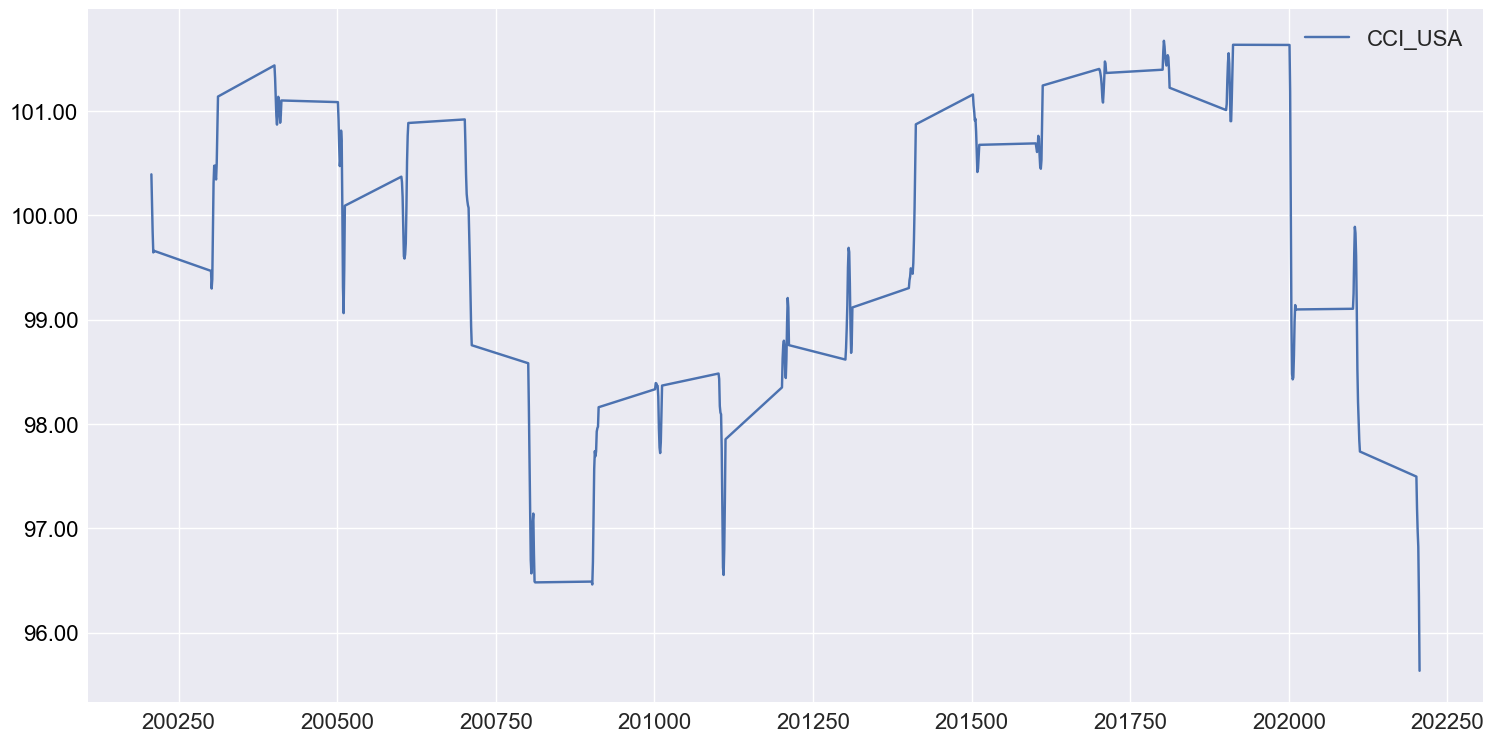

,date,unit_sales_CA_1_HOUSEHOLD_1_HOUSEHOLD_1_416,unit_sales_CA_1_FOODS_2_FOODS_2_044,unit_sales_CA_1_FOODS_3_FOODS_3_030,unit_sales_CA_1_HOBBIES_1_HOBBIES_1_418,unit_sales_CA_1_FOODS_3_FOODS_3_393,sell_price_CA_1_HOUSEHOLD_1_HOUSEHOLD_1_416,sell_price_CA_1_FOODS_2_FOODS_2_044,sell_price_CA_1_FOODS_3_FOODS_3_030,sell_price_CA_1_HOBBIES_1_HOBBIES_1_418,sell_price_CA_1_FOODS_3_FOODS_3_393,year,month,week,weekday,yearmonth,event_name_1,event_name_2,snap_CA,CCI_USA
0,2013-02-02,2.0,0.0,43.0,0.0,4.0,3.47,2.5,1.28,3.74,3.5,2013,2,5,Saturday,201302,NaN,NaN,1,98.72734
1,2013-02-03,0.0,0.0,33.0,0.0,5.0,3.47,2.5,1.28,3.74,3.5,2013,2,5,Sunday,201302,SuperBowl,NaN,1,98.72734
2,2013-02-04,1.0,1.0,5.0,0.0,1.0,3.47,2.5,1.28,3.74,3.5,2013,2,6,Monday,201302,NaN,NaN,1,98.72734
3,2013-02-05,0.0,1.0,14.0,0.0,2.0,3.47,2.5,1.28,3.74,3.5,2013,2,6,Tuesday,201302,NaN,NaN,1,98.72734
4,2013-02-06,0.0,1.0,11.0,0.0,2.0,3.47,2.5,1.28,3.74,3.5,2013,2,6,Wednesday,201302,NaN,NaN,1,98.72734


In [11]:
data_path_oecd = "../data"
cci_all = pd.read_csv(f'{data_path_oecd}/OECD_CCI_DOWNLOAD_DP_LIVE_2507_20220725.csv')

#All
print(f'\nCCI locations all')
cci_locations = cci_all.groupby("LOCATION")['TIME'].count()
display(cci_locations.head(5))

# USA
display(cci_all.head(5))
cci_usa = cci_all[cci_all['LOCATION']=='USA'].copy()
cci_usa['yearmonth']=100*cci_usa['TIME'].str[:4].astype(int) + cci_usa['TIME'].str[5:].astype(int)
cci_usa=cci_usa.rename({'Value':'CCI_USA'},axis=1)
print('\ncci_usa')
display(cci_usa.head(5))


bp.lineplot(cci_usa.tail(12*20), x="yearmonth",  y=["CCI_USA"] , figsize=(18,9))

sales_N_items_calevents_wide.head()

sales_N_items_calevents_cci_wide = sales_N_items_calevents_wide.merge(cci_usa[["yearmonth","CCI_USA"]],on="yearmonth", how="left")

sales_N_items_calevents_cci_wide.head()


# Save 

In [12]:

data_path="../data"

filename=f'm5_sales_{Nitems}_items_events_cci_wide.csv'
file = f'{data_path}/{filename}'

save_file=True
if save_file == True:
    print(sales_N_items_calevents_cci_wide.shape)
    print(file)
    display(sales_N_items_calevents_cci_wide.head())
    sales_N_items_calevents_cci_wide.to_csv(file,index=False)
  
# (751, 52)
# ../data/m5_sales_20_items_events_cci.csv

(1206, 20)
../data/m5_sales_7_items_events_cci_wide.csv


,date,unit_sales_CA_1_HOUSEHOLD_1_HOUSEHOLD_1_416,unit_sales_CA_1_FOODS_2_FOODS_2_044,unit_sales_CA_1_FOODS_3_FOODS_3_030,unit_sales_CA_1_HOBBIES_1_HOBBIES_1_418,unit_sales_CA_1_FOODS_3_FOODS_3_393,sell_price_CA_1_HOUSEHOLD_1_HOUSEHOLD_1_416,sell_price_CA_1_FOODS_2_FOODS_2_044,sell_price_CA_1_FOODS_3_FOODS_3_030,sell_price_CA_1_HOBBIES_1_HOBBIES_1_418,sell_price_CA_1_FOODS_3_FOODS_3_393,year,month,week,weekday,yearmonth,event_name_1,event_name_2,snap_CA,CCI_USA
0,2013-02-02,2.0,0.0,43.0,0.0,4.0,3.47,2.5,1.28,3.74,3.5,2013,2,5,Saturday,201302,NaN,NaN,1,98.72734
1,2013-02-03,0.0,0.0,33.0,0.0,5.0,3.47,2.5,1.28,3.74,3.5,2013,2,5,Sunday,201302,SuperBowl,NaN,1,98.72734
2,2013-02-04,1.0,1.0,5.0,0.0,1.0,3.47,2.5,1.28,3.74,3.5,2013,2,6,Monday,201302,NaN,NaN,1,98.72734
3,2013-02-05,0.0,1.0,14.0,0.0,2.0,3.47,2.5,1.28,3.74,3.5,2013,2,6,Tuesday,201302,NaN,NaN,1,98.72734
4,2013-02-06,0.0,1.0,11.0,0.0,2.0,3.47,2.5,1.28,3.74,3.5,2013,2,6,Wednesday,201302,NaN,NaN,1,98.72734
